<a href="https://colab.research.google.com/github/domywillygithub/Codes/blob/main/TSE_TASK5_Correlation_and_Stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation and Stationarity analysis on IBM stock data

In [90]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.tsa.stattools import adfuller, kpss
import seaborn as sns

In [91]:
# set the start and end dates
start_date = "2022-10-01"
end_date = "2022-12-15"

# download IBM stock data
IBM = yf.download("IBM", start=start_date, end=end_date)

# create a dataframe 
df = pd.DataFrame(IBM)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,120.160004,122.209999,119.599998,121.510002,118.621284,4261700
2022-10-04,122.800003,125.650002,122.519997,125.500000,122.516426,4566100
2022-10-05,124.709999,126.459999,124.230003,125.739998,122.750710,3212900
2022-10-06,124.879997,125.300003,121.769997,122.230003,119.324165,5074600
2022-10-07,121.500000,121.800003,118.070000,118.820000,115.995232,4499700
2022-10-10,119.790001,119.959999,117.040001,117.750000,114.950668,5990000
2022-10-11,117.459999,119.230003,116.940002,117.800003,114.999489,4043100
2022-10-12,118.000000,118.809998,117.199997,117.570000,114.774948,3338800
2022-10-13,116.099998,122.150002,115.550003,121.790001,118.894630,5837500


In [92]:
df = df['Close']
df

Date
2022-10-03    121.510002
2022-10-04    125.500000
2022-10-05    125.739998
2022-10-06    122.230003
2022-10-07    118.820000
2022-10-10    117.750000
2022-10-11    117.800003
2022-10-12    117.570000
2022-10-13    121.790001
2022-10-14    120.040001
2022-10-17    121.519997
2022-10-18    122.940002
2022-10-19    122.510002
2022-10-20    128.300003
2022-10-21    129.899994
2022-10-24    132.690002
2022-10-25    132.929993
2022-10-26    135.009995
2022-10-27    134.770004
2022-10-28    138.509995
2022-10-31    138.289993
2022-11-01    138.199997
2022-11-02    136.830002
2022-11-03    134.470001
2022-11-04    136.960007
2022-11-07    138.339996
2022-11-08    140.039993
2022-11-09    137.389999
2022-11-10    141.229996
2022-11-11    143.169998
2022-11-14    144.199997
2022-11-15    144.339996
2022-11-16    144.520004
2022-11-17    146.089996
2022-11-18    147.639999
2022-11-21    146.679993
2022-11-22    149.100006
2022-11-23    148.750000
2022-11-25    148.369995
2022-11-28    146.17

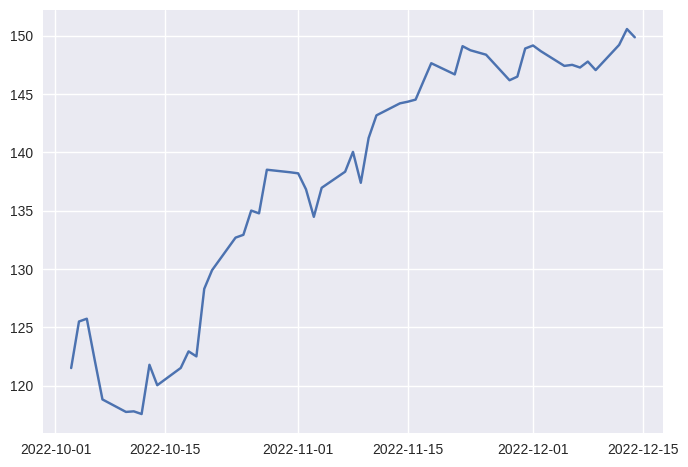

In [93]:
plt.plot(df)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

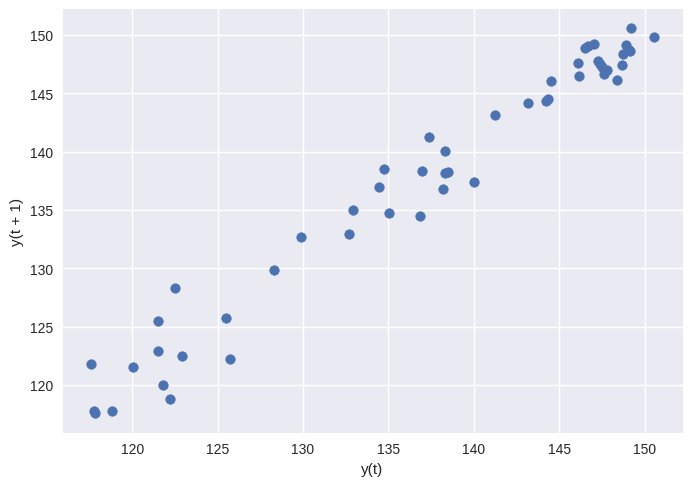

In [94]:
lag_plot(df)

(-0.25, 1.0)

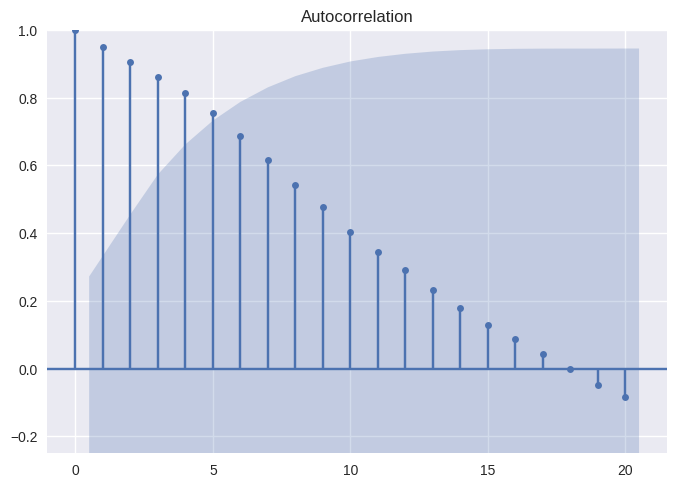

In [95]:
fig=plot_acf(df,lags=20,zero=True)
plt.ylim([-0.25,1.00])

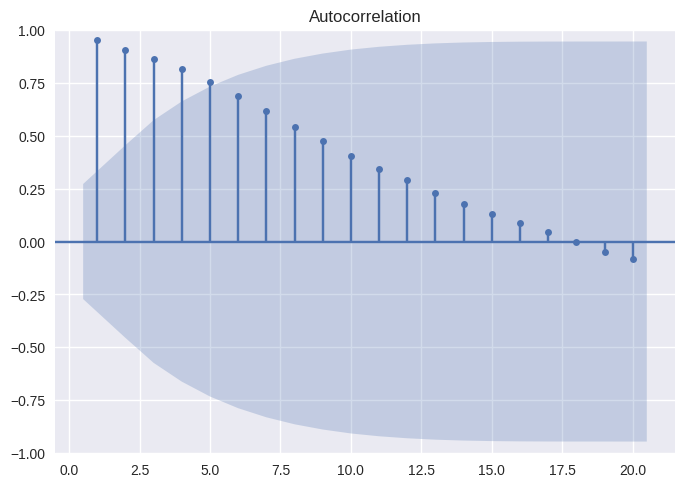

In [96]:
fig=plot_acf(df,lags=20,zero=False)

All displayed coefficients (apart from the ones for zero to 5 lags) are within the confidence interval. We expect that there are no correlations.

Means there are correlations only from zero to five lags apart from it there are no correlations as all the autocorrelation coefficients fall within the confidence interval

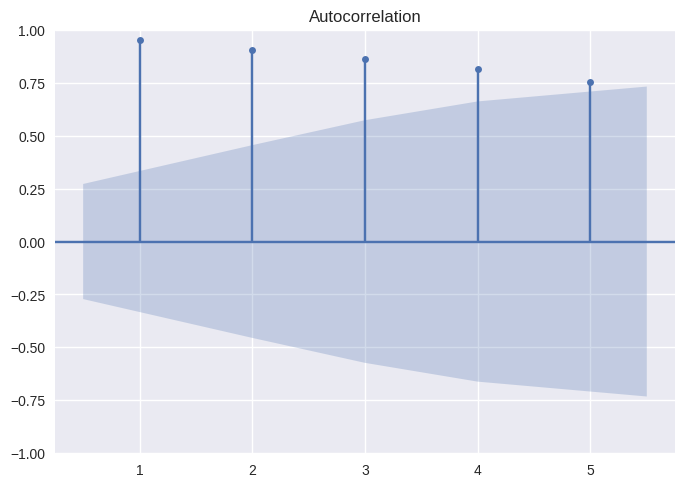

In [97]:
fig=plot_acf(df,lags=5,zero=False)

In [98]:
acorr_ljungbox(df,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,330.602743,4.359206e-58


The null hypothesis for the Ljung-Box test is that the first k autocorrelation coefficients are not statistically different from zero (no correlations)

If the p-value for the Ljung-Box test is less than a specified significance level (typically 0.05), we reject the null hypothesis and conclude that there is evidence of non-randomness or non-stationarity in the time series. On the other hand, if the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no evidence of non-randomness or non-stationarity in the time series

from above result its clearly that the p value is less than significant level therefore we have to reject the null hypothesis and conclude that there is evidence of non-randomness or non-stationarity in the time series

In [99]:
acorr_ljungbox(df,lags=20,return_df=True)

,lb_stat,lb_pvalue
1,49.647329,1.840204e-12
2,95.709808,1.647704e-21
3,138.188974,9.288204e-30
4,176.923863,3.412790e-37
5,210.847024,1.355455e-43
6,239.542179,7.030763e-49
7,263.157368,4.372785e-53
8,281.815527,3.037163e-56
9,296.638983,1.347450e-58
10,307.566169,3.905238e-60


In [100]:
adfuller(df)

(-0.9398265301140808,
 0.7745742921429304,
 0,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 155.1845295797504)

the ADF test is a statistical test used to determine whether a time series is stationary or non-stationary. A low p-value from the test suggests evidence of stationarity in the time series, while a high p-value suggests evidence of non-stationarity.

If the p-value is less than a specified significance level (typically 0.05), we reject the null hypothesis of a unit root and conclude that the time series is stationary. On the other hand, if the p-value is greater than the significance level, we fail to reject the null hypothesis of a unit root and conclude that the time series is non-stationary.

from above result its clearly that the p value is greather that than a specified significant level therefore we fail to reject the null hypothesis of a unit root and conclude that the time series is non-stationary.

In [101]:
df_diff = df.diff().dropna()
df_diff

Date
2022-10-04    3.989998
2022-10-05    0.239998
2022-10-06   -3.509995
2022-10-07   -3.410004
2022-10-10   -1.070000
2022-10-11    0.050003
2022-10-12   -0.230003
2022-10-13    4.220001
2022-10-14   -1.750000
2022-10-17    1.479996
2022-10-18    1.420006
2022-10-19   -0.430000
2022-10-20    5.790001
2022-10-21    1.599991
2022-10-24    2.790009
2022-10-25    0.239990
2022-10-26    2.080002
2022-10-27   -0.239990
2022-10-28    3.739990
2022-10-31   -0.220001
2022-11-01   -0.089996
2022-11-02   -1.369995
2022-11-03   -2.360001
2022-11-04    2.490005
2022-11-07    1.379990
2022-11-08    1.699997
2022-11-09   -2.649994
2022-11-10    3.839996
2022-11-11    1.940002
2022-11-14    1.029999
2022-11-15    0.139999
2022-11-16    0.180008
2022-11-17    1.569992
2022-11-18    1.550003
2022-11-21   -0.960007
2022-11-22    2.420013
2022-11-23   -0.350006
2022-11-25   -0.380005
2022-11-28   -2.190002
2022-11-29    0.310013
2022-11-30    2.409988
2022-12-01    0.260010
2022-12-02   -0.490005
2022-1

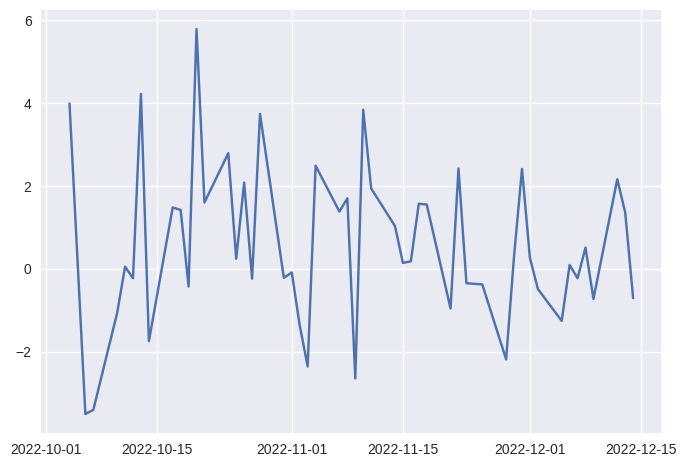

In [102]:
plt.plot(df_diff)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

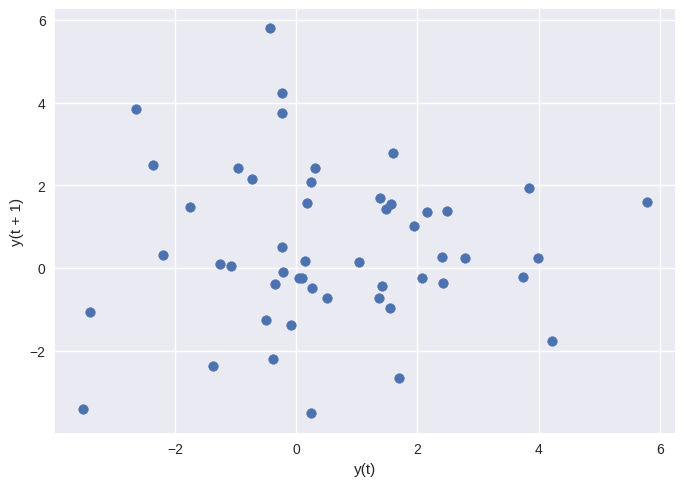

In [103]:
lag_plot(df_diff)

(-0.5, 0.25)

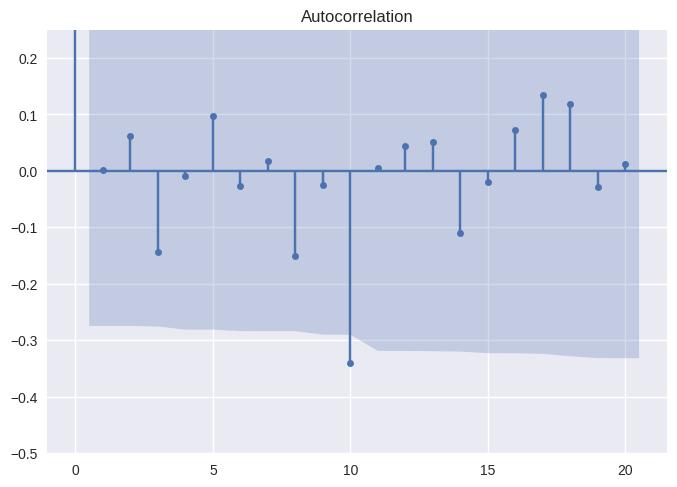

In [104]:
fig=plot_acf(df_diff,lags=20,zero=True)
plt.ylim([-0.5,0.25])

(-0.5, 0.25)

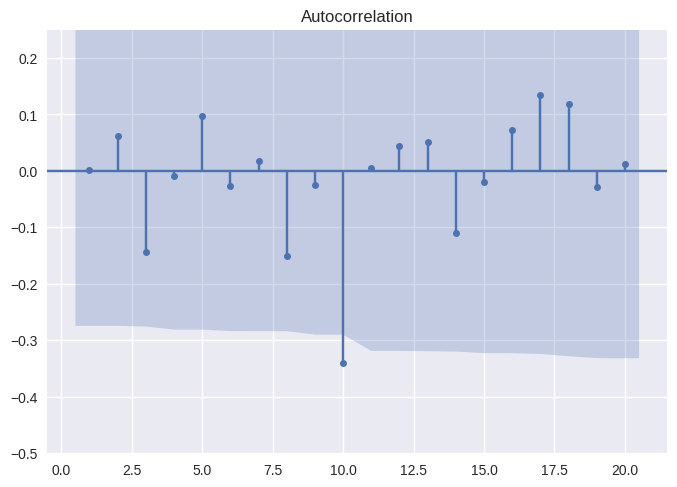

In [105]:
fig=plot_acf(df_diff,lags=20,zero=False)
plt.ylim([-0.5,0.25])

All displayed coefficients (apart from the ones for zero and 10 lags) are within the confidence interval. We expect that there are no correlations.

Means there is correlations only for zero and ten lags apart from it there is no correlations as all the autocorrelation coefficients fall within the confidence interval

In [38]:
acorr_ljungbox(df_diff,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,15.453289,0.74991


The null hypothesis for the Ljung-Box test is that the first k autocorrelation coefficients are not statistically different from zero (no correlations)

Means If the p-value for the Ljung-Box test is less than a specified significance level (typically 0.05), we reject the null hypothesis and conclude that there is evidence of non-randomness or non-stationarity in the time series. On the other hand, if the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no evidence of non-randomness or non-stationarity in the time series

from above result its clearly that the p value is greather than significant level therefore we fail to reject the null hypothesis and conclude that there is no evidence of non-randomness or non-stationarity in the time series

In [39]:
acorr_ljungbox(df_diff,lags=20,return_df=True)

,lb_stat,lb_pvalue
1,0.000186,0.989111
2,0.210220,0.900226
3,1.363646,0.714078
4,1.367764,0.849778
5,1.922366,0.859780
6,1.964599,0.922925
7,1.982914,0.960780
8,3.421347,0.905207
9,3.460384,0.943222
10,11.117491,0.348438


In [40]:
adfuller(df_diff)

(-3.49754121978203,
 0.008050465740386568,
 9,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 153.77750286497988)

from above result its clearly that the p value is less than than a specified significant level therefore we reject the null hypothesis of a unit root and conclude that the time series is stationary

# Airline Passengers dataset ([get dataset](https://drive.proton.me/urls/VGKPANFN88#DSOmMSj6NSeV))



In [72]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [52]:
df.index.freq='MS'

<Axes: xlabel='Month'>

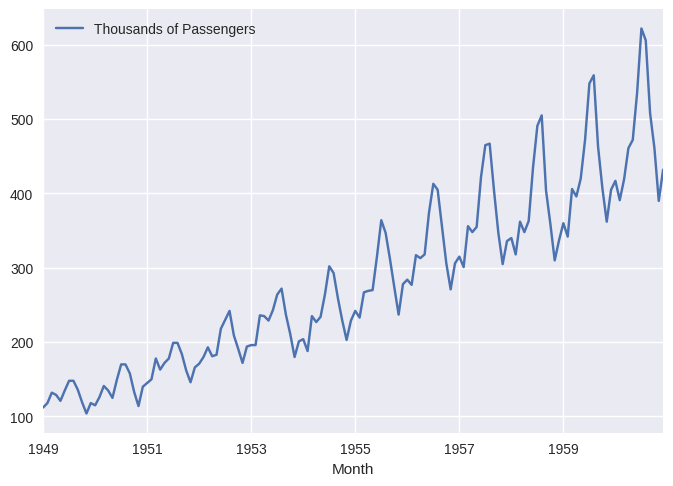

In [53]:
df.plot()

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultSeasonal=seasonal_decompose(df['Thousands of Passengers'], model='Additive' )

<Axes: xlabel='Month'>

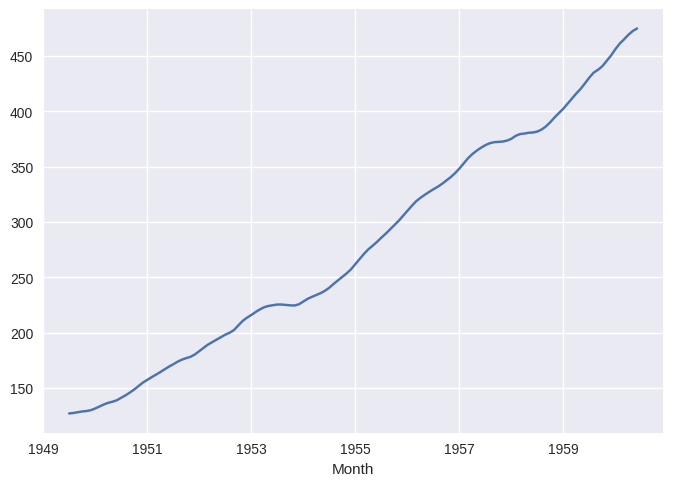

In [59]:
resultSeasonal.trend.plot()

<Axes: xlabel='Month'>

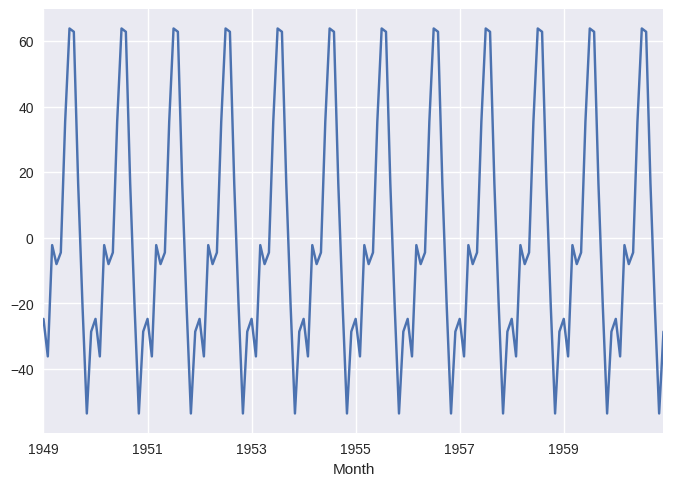

In [60]:
resultSeasonal.seasonal.plot()

<Axes: xlabel='Month'>

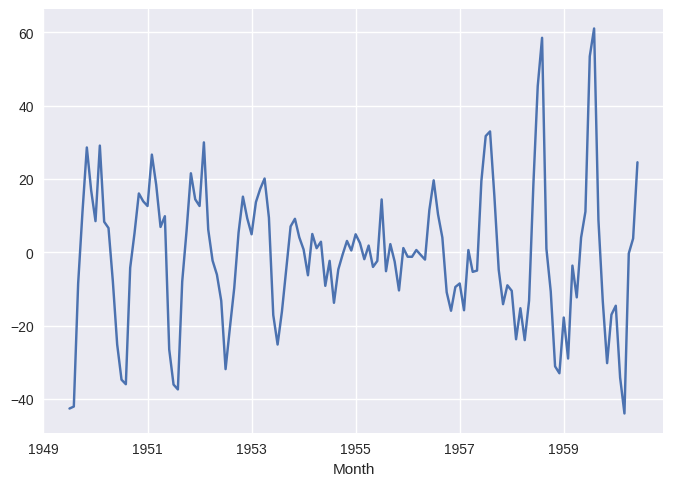

In [61]:
resultSeasonal.resid.plot()

In [55]:
df_diff = df.diff().dropna()
df_diff

,Thousands of Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


<Axes: xlabel='Month'>

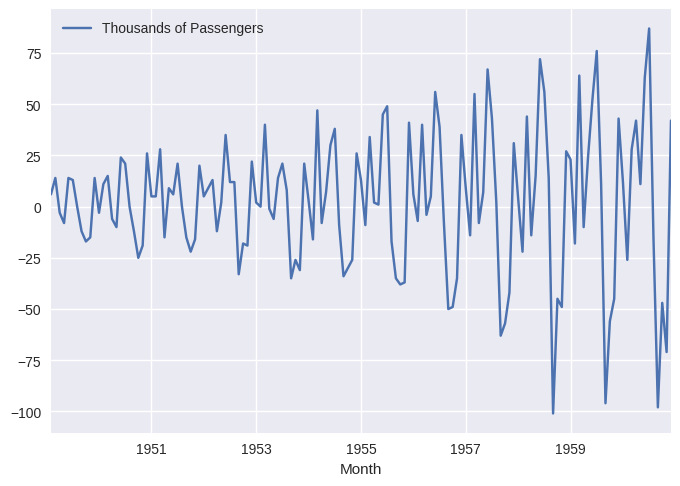

In [56]:
df_diff.plot()

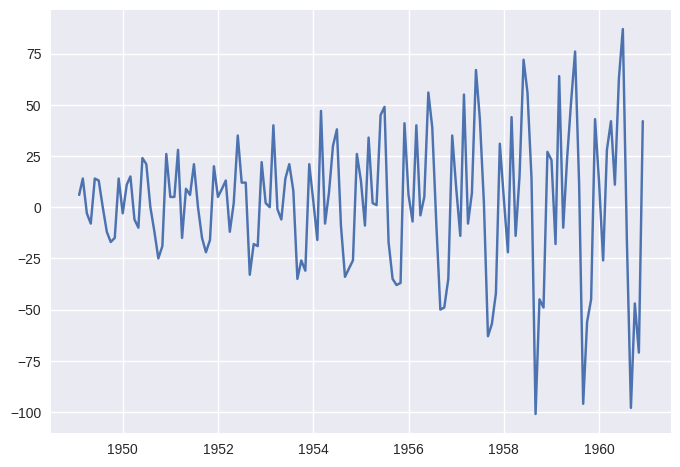

In [57]:
plt.plot(df_diff)

In [62]:
resultSeasonal=seasonal_decompose(df_diff['Thousands of Passengers'], model='Additive' )

<Axes: xlabel='Month'>

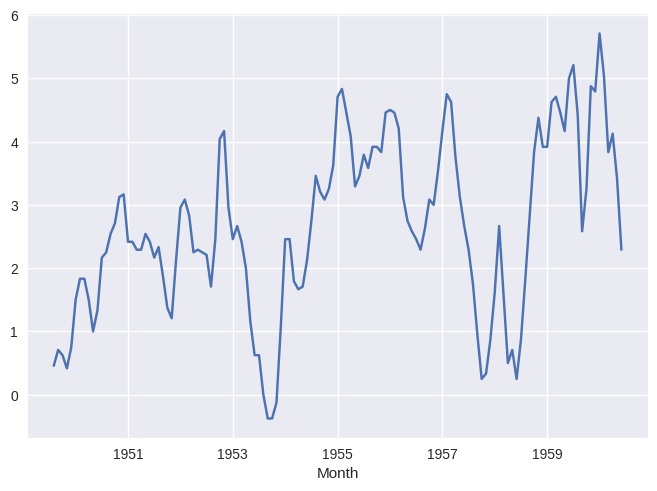

In [63]:
resultSeasonal.trend.plot()

<Axes: xlabel='Month'>

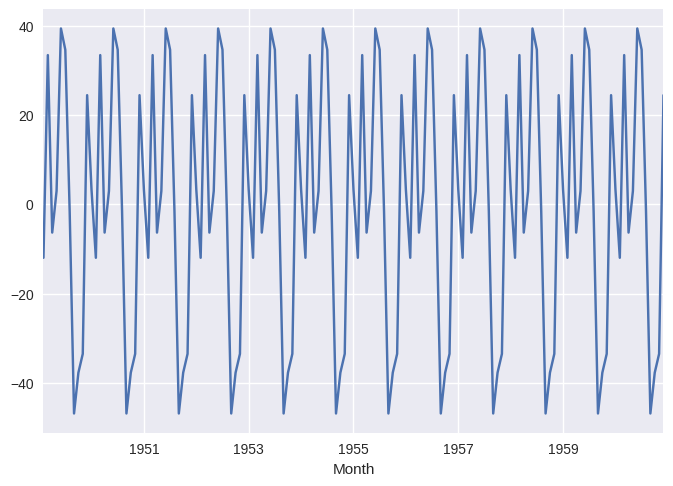

In [64]:
resultSeasonal.seasonal.plot()

<Axes: xlabel='Month'>

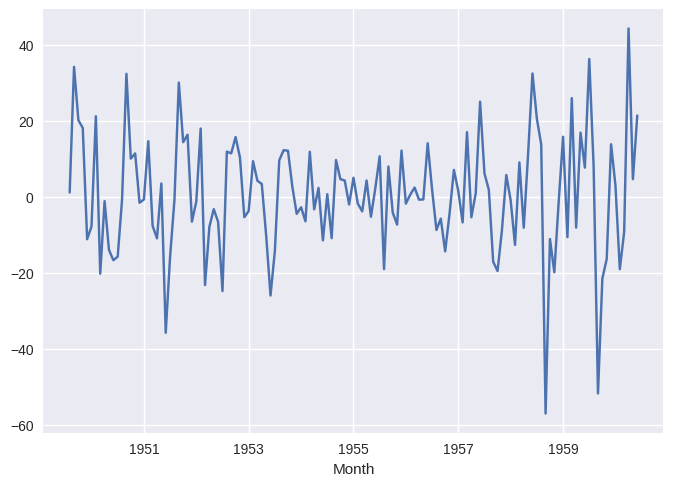

In [65]:
resultSeasonal.resid.plot()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

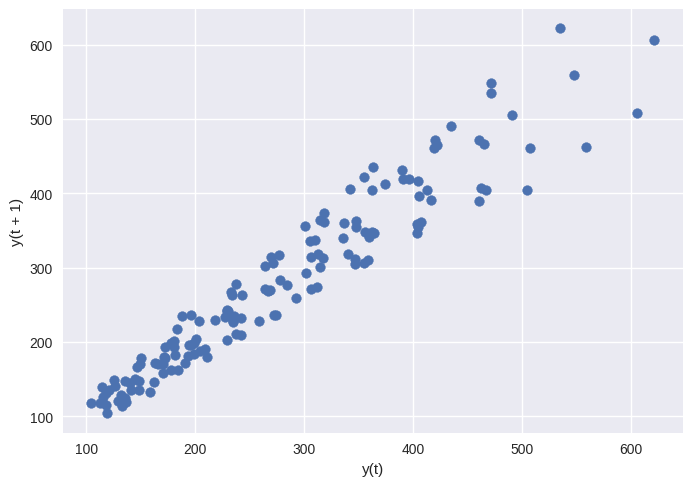

In [73]:
lag_plot(df)

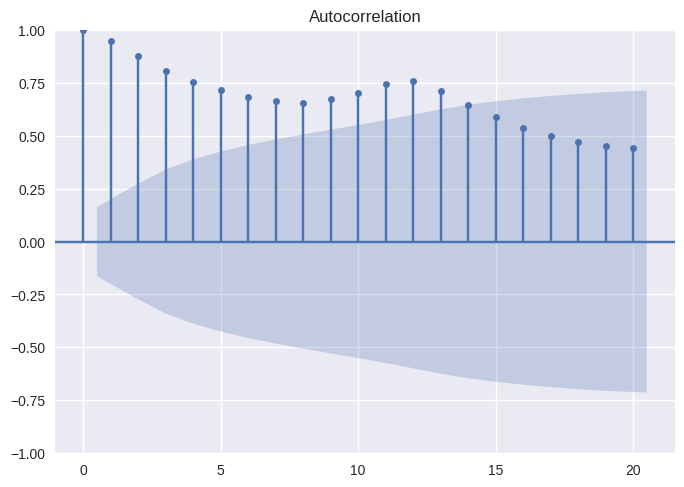

In [74]:
fig=plot_acf(df,lags=20,zero=True)
#plt.ylim([-0.5,0.25])

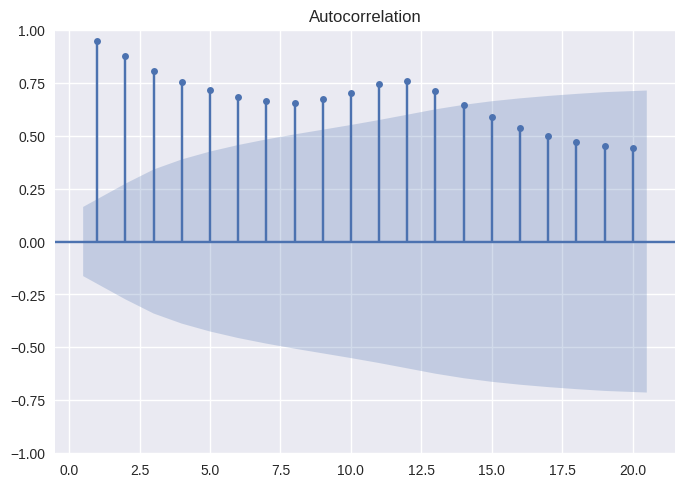

In [80]:
fig=plot_acf(df,lags=20,zero=False)
#plt.ylim([-0.5,0.25])

In [ ]:
plot_acf(df, lags=13, zero=True)

All displayed coefficients (apart from the ones for zero to thirteen lags) are within the confidence interval. We expect that there are no correlations.

Means there is correlations only from zero to thirteen lags apart from it there is no correlations as all the autocorrelation coefficients fall within the confidence interval

In [81]:
acorr_ljungbox(df,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,1434.148907,5.300473e-292


The null hypothesis for the Ljung-Box test is that the first k autocorrelation coefficients are not statistically different from zero (no correlations)

Means If the p-value for the Ljung-Box test is less than a specified significance level (typically 0.05), we reject the null hypothesis and conclude that there is evidence of non-randomness or non-stationarity in the time series. On the other hand, if the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no evidence of non-randomness or non-stationarity in the time series

from above result its clearly that the p value is less than significant level therefore we reject the null hypothesis and conclude that there is evidence of non-randomness or non-stationarity in the time series

In [82]:
acorr_ljungbox(df,lags=20,return_df=True)

,lb_stat,lb_pvalue
1,132.141539,1.393231e-30
2,245.646160,4.556318e-54
3,342.674826,5.751088e-74
4,427.738684,2.817731e-91
5,504.796570,7.360195e-107
6,575.601854,4.264008e-121
7,643.038593,1.305463e-134
8,709.484498,6.496271e-148
9,779.591231,5.249370e-162
10,857.068639,1.100789e-177


In [79]:
adfuller(df)

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

from above result its clearly that the p value is greather that than a specified significant level therefore we fail to reject the null hypothesis of a unit root and conclude that the time series is non-stationary.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

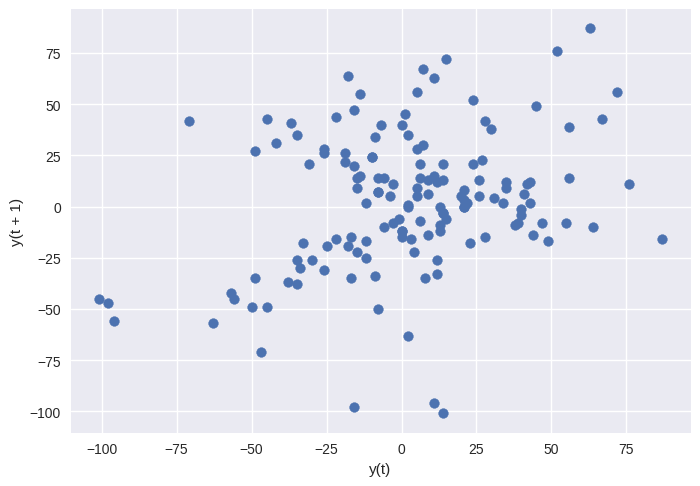

In [66]:
lag_plot(df_diff)

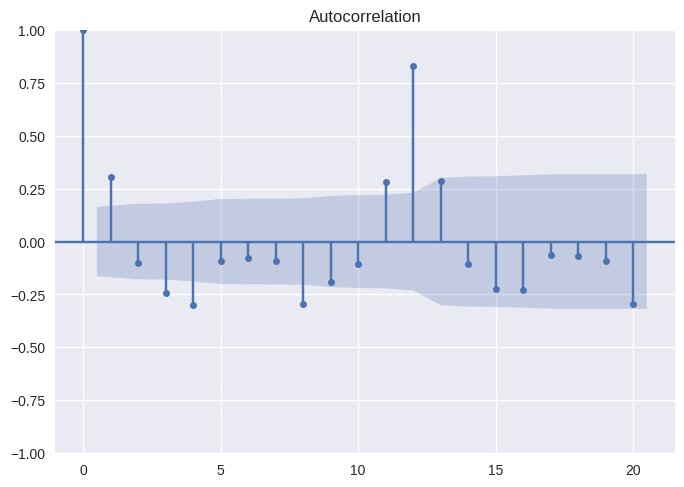

In [67]:
fig=plot_acf(df_diff,lags=20,zero=True)
#plt.ylim([-0.5,0.25])

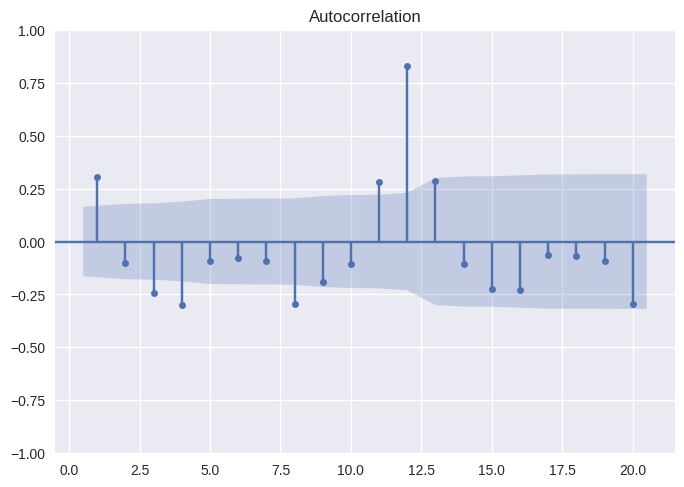

In [68]:
fig=plot_acf(df_diff,lags=20,zero=False)
#plt.ylim([-0.5,0.25])

All displayed coefficients (apart from the ones for zero,one,three,four,eight,eleven and twelve lags) are within the confidence interval. We expect that there are no correlations.
Means there is correlations only for zero,one,three,four,eight,eleven and twelve  lags apart from it there is no correlations as all the autocorrelation coefficients fall within the confidence interval

In [69]:
acorr_ljungbox(df_diff,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,231.758539,5.312981e-38


The null hypothesis for the Ljung-Box test is that the first k autocorrelation coefficients are not statistically different from zero (no correlations)

Means If the p-value for the Ljung-Box test is less than a specified significance level (typically 0.05), we reject the null hypothesis and conclude that there is evidence of non-randomness or non-stationarity in the time series. On the other hand, if the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no evidence of non-randomness or non-stationarity in the time series

from above result its clearly that the p value is less than significant level therefore we reject the null hypothesis and conclude that there is evidence of non-randomness or non-stationarity in the time series

In [70]:
acorr_ljungbox(df_diff,lags=20,return_df=True)

,lb_stat,lb_pvalue
1,13.393249,2.525316e-04
2,14.927657,5.734566e-04
3,23.549402,3.101926e-05
4,37.010908,1.792006e-07
5,38.340604,3.223072e-07
6,39.271899,6.330720e-07
7,40.572528,9.778688e-07
8,53.920949,7.151547e-09
9,59.612069,1.592385e-09
10,61.328178,2.030094e-09


In [71]:
adfuller(df_diff)

(-2.8292668241700047,
 0.05421329028382478,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

from above result its clearly that the p value is greather that than a specified significant level therefore we fail to reject the null hypothesis of a unit root and conclude that the time series is non-stationary.